In [463]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [464]:
from sklearn. preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer

In [465]:
df = pd.read_csv("kidney_disease.csv")

In [466]:
pd.set_option('display.max_columns', df.shape[1])
df.head(1)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [468]:
for i in df.columns:
    if df[i].isnull().sum() != 0:
        print(i, df[i].dtype, df[i].isnull().sum())

age float64 9
bp float64 12
sg float64 47
al float64 46
su float64 49
rbc object 152
pc object 65
pcc object 4
ba object 4
bgr float64 44
bu float64 19
sc float64 17
sod float64 87
pot float64 88
hemo float64 52
pcv object 70
wc object 105
rc object 130
htn object 2
dm object 2
cad object 2
appet object 1
pe object 1
ane object 1


In [469]:
# nan_rows = df[df.isna().all(axis=1)]
# nan_rows

# nan_columns = df.loc[:, df.isna().all()]
# nan_columns
# df.isna().all()


In [470]:
def get_heat_map_corr(corr_df, figsize=(10, 9), remove_cols=[], corr_method='pearson', title=None):

    df_temp = corr_df
    for i in remove_cols:
        try:
            df_temp = df_temp.drop(i,axis=1)
        except:
            print(f'column {i} not found')
    
    for c in df_temp.columns:
        if df_temp[c].dtype == 'object':
            df_temp = df_temp.drop(c,axis=1)

    corr = df_temp.corr(method=corr_method)

    f, ax = plt.subplots(figsize=figsize)

    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    if title != None:
        plt.title(title)

    # sns.heatmap(corr, annot=True, cmap=cmap)
    sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

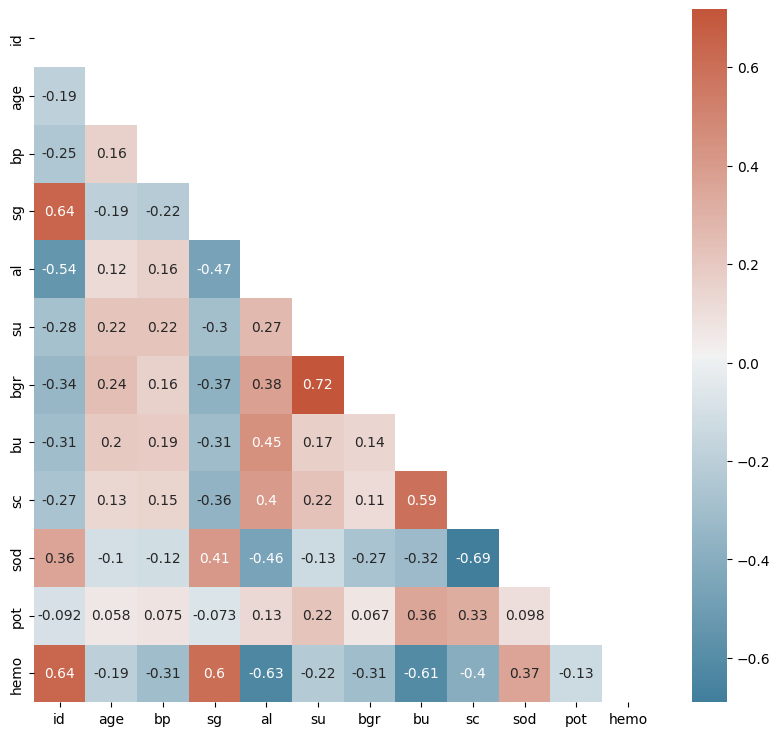

In [471]:
get_heat_map_corr(df)

In [472]:
# to change true/false
    # pcc ba
        # notpresent / present
    # htn   pe  ane
        # yes / no
    # cad
        # no yes \tno
    # dm
        # no yes \tno \tyes yes 
    # cad
        # no yes \tno
    # appet ??
        # good poor
# to change to class
    # rbc   pc
        # normal abnormal


df.columns

col = df["su"]
print(col.value_counts(), col.isnull().sum(axis=0))
df.head(3)


su
0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64 49


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [473]:
# temp = df[:]
# threshold = 4

# for c in temp.columns:
#     unique = temp[c].nunique()
#     if unique <= threshold:
#         # print()
#         # print(c, unique)
#         # print(df[c].value_counts())
#         temp = temp.drop(c,axis=1)

In [474]:
# make changes to different dataframe so that original keeps it's oririnal form
filt_df = df[:]
filt_df = filt_df.iloc[:,1:]
filt_df 

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


In [475]:
# taking care of \t

    # cad
    # dm
    # cad

filt_df.replace('\t', "", regex=True, inplace=True)
filt_df.replace(' ', "", regex=True, inplace=True)
filt_df.replace('?', np.nan, inplace=True)
# df = df.replace('?', )

filt_df['dm'].value_counts()

dm
no     261
yes    137
Name: count, dtype: int64

In [476]:
label = LabelEncoder()

cols_to_encode = [
    'pcc',
    'ba',
    'htn',
    'pe',
    'ane',
    'cad',
    'dm',
    'cad',
    'appet',
    'rbc',
    'pc',
    'classification',
]

for c in cols_to_encode:
    label.fit(filt_df[c].drop_duplicates())
    filt_df[c] = label.transform(filt_df[c])
    # print(c, filt_df[c].isnull().sum())

filt_df.head(3)

# filt_df.isnull().sum()
# # df
# for c in cols_to_encode:
#     print()
#     print(filt_df[c].value_counts())

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,2,1,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.02,4.0,0.0,2,1,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0,0,0,0,0,0,0
2,62.0,80.0,1.01,2.0,3.0,1,1,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0,1,0,1,0,1,0


In [22]:
X = filt_df.iloc[:,:-1]
X
y = filt_df.iloc[:, -1]
y

# replace nan with mean()
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
# X
# X.isnull().sum()

id       0
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

### LinearRegression

In [478]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=100)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
# X_train

LinearRegression()

In [479]:
lin_model.score(X_test,y_test)

0.7205722179452041

In [480]:
# coefficent
data = {}
for indx, col_name in enumerate(X_train):
    # print(col_name, lin_model.coef_[indx])
    # print(col_name, indx, lin_model.coef_[indx])
    data[col_name] = lin_model.coef_[indx]
data = dict(sorted(data.items(), key=lambda x: x[1],reverse=True))
data

{'sg': 27.586921461904986,
 'ane': 0.1032011964923328,
 'cad': 0.08838281273662209,
 'pcc': 0.07263494750255142,
 'ba': 0.0607343617425641,
 'hemo': 0.04196144521017294,
 'rc': 0.034130675632642674,
 'su': 0.0174818312671226,
 'sod': 0.006613647083309924,
 'pe': 0.005453114504924644,
 'pcv': 0.005113349449303178,
 'bu': 0.0005792908816781283,
 'age': 0.00019259716273907767,
 'wc': -4.289842372677894e-06,
 'pot': -0.0002490653894332596,
 'bgr': -0.000403452033450209,
 'bp': -0.0022383705246146177,
 'pc': -0.0024059339988566583,
 'htn': -0.004630991070872841,
 'sc': -0.00877854845582123,
 'appet': -0.046106623160179105,
 'al': -0.09471659836190856,
 'dm': -0.1006470663236482,
 'rbc': -0.15789619010569345}

In [481]:
y_pred = lin_model.predict(X_test)
pred = pd.DataFrame(X_test)
pred['y_test'] = y_test
pred['y_pred'] = y_pred
pred

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,y_test,y_pred
248,59.0,70.0,1.010,1.0,3.0,0.0,0.0,0.0,0.0,424.0,55.0,1.7,138.0,4.5,12.6,37.0,10200.000000,4.100000,1.0,1.0,1.0,0.0,0.0,0.0,0,0.287007
318,61.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,120.0,29.0,0.7,137.0,3.5,17.4,52.0,7000.000000,5.300000,0.0,0.0,0.0,0.0,0.0,0.0,1,1.042862
173,17.0,70.0,1.015,1.0,0.0,0.0,1.0,0.0,0.0,22.0,1.5,7.3,145.0,2.8,13.1,41.0,11200.000000,4.707435,0.0,0.0,0.0,0.0,0.0,0.0,0,0.565528
285,66.0,70.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,94.0,19.0,0.7,135.0,3.9,16.0,41.0,5300.000000,5.900000,0.0,0.0,0.0,0.0,0.0,0.0,1,0.810038
184,54.0,60.0,1.015,3.0,2.0,2.0,0.0,0.0,0.0,352.0,137.0,3.3,133.0,4.5,11.3,31.0,5800.000000,3.600000,1.0,1.0,1.0,1.0,1.0,0.0,0,-0.170982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,74.0,80.0,1.010,0.0,0.0,2.0,1.0,0.0,0.0,132.0,98.0,2.8,133.0,5.0,10.8,31.0,9400.000000,3.800000,1.0,1.0,0.0,0.0,0.0,0.0,0,-0.109947
157,62.0,70.0,1.025,3.0,0.0,1.0,0.0,0.0,0.0,122.0,42.0,1.7,136.0,4.7,12.6,39.0,7900.000000,3.900000,1.0,1.0,0.0,0.0,0.0,0.0,0,0.327533
300,45.0,60.0,1.020,0.0,0.0,1.0,1.0,2.0,2.0,114.0,26.0,0.7,141.0,4.2,15.0,43.0,9200.000000,5.800000,0.0,0.0,0.0,0.0,0.0,0.0,1,1.078831
31,73.0,90.0,1.015,3.0,0.0,2.0,0.0,1.0,0.0,107.0,33.0,1.5,141.0,4.6,10.1,30.0,7800.000000,4.000000,0.0,0.0,0.0,1.0,0.0,0.0,0,-0.128470


In [482]:
# # don't know why it gives err, it worked before
# print(y_test)
# print(y_pred)
# confusion_matrix(y_pred, y_test)

# # # y_tmp = y_test.to_numpy()
# # # y_tmp = y_tmp / np.linalg.norm(y_tmp)
# # # confusion_matrix(y_pred, y_tmp)

### LogisticRegression

In [483]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X,y,test_size=.6,random_state=40)

# # scaler_x = preprocessing.StandardScaler().fit(X_log_train)
# # scaler_x.mean_
# # scaler_x.scale_
# # X_log_train = scaler_x.transform(X_log_train)

# # tmp = X_log_train[:]
# pipe = make_pipeline(StandardScaler(), LogisticRegression())
# pipe.fit(X_log_train, y_log_train)
# # print(X_log_train == tmp)

logistic_model = LogisticRegression()
logistic_model = LogisticRegression(max_iter=1050)
logistic_model.fit(X_log_train, y_log_train)
pred_log = logistic_model.predict(X_log_test)

logistic_model.score(X_log_test,y_log_test)

0.975

In [484]:
logistic_model.score(X_log_test,y_log_test)

0.975

In [485]:
print(y_log_test.shape)
print(pred_log.shape)
confusion_matrix(y_log_test,pred_log)

(240,)
(240,)


array([[144,   5],
       [  1,  90]], dtype=int64)